# **Ecommerce Customer Satisfaction Score Prediction**

## **Project Summary -**

This project focuses on developing an AI-driven solution to automatically predict Customer Satisfaction (CSAT) scores from e-commerce customer feedback and interaction data.
By combining Natural Language Processing (NLP) and Deep Learning (ANN), the system analyzes both textual comments and quantitative service metrics to evaluate satisfaction levels on a scale of 1 to 5.

**The DeepCSAT model helps e-commerce companies:**

Identify dissatisfied customers in real time,

Measure service quality objectively, and

Take proactive steps to improve customer experience.

A Streamlit-based web application was deployed locally to enable quick and interactive CSAT predictions, making the system accessible for daily operational insights.

## **Problem Statement**

E-commerce businesses receive thousands of customer feedback entries daily, but most of these are 
unstructured text (e.g., complaints, reviews, or chat transcripts). Manually analyzing this data 
to measure satisfaction is time-consuming, inconsistent, and error-prone.

**Problem Objective:**

To build an automated system that can predict Customer Satisfaction (CSAT) scores from both text 
feedback and numerical service metrics (price, handling time, etc.).

To enable real-time insights for improving delivery, support, and overall service quality.




## **Github Link**

https://github.com/beenafrancis0797-byte/DeepCSAT-Ecommerce

In [1]:
#import libraries
import os, json, math, random
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)


In [2]:
df = pd.read_csv('eCommerce_Customer_support_data (1).csv')
print("Shape:", df.shape)

Shape: (85907, 20)


In [3]:
print("Columns:", df.columns.tolist())

Columns: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [4]:
display(df.head(5))

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [5]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unique id,85907,85907,07c7a878-0d5a-42e0-97ef-de59abec0238,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
channel_name,85907,3,Inbound,68142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,85907,12,Returns,44097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-category,85907,57,Reverse Pickup Enquiry,22389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Remarks,28742,18231,Good,1390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,67675,67675,3230db30-f8da-4c44-8636-ec76d1d3d4f3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date_time,17214,13766,09/08/2023 11:55,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Issue_reported at,85907,30923,13/08/2023 10:40,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_responded,85907,30262,28/08/2023 00:00,3378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survey_response_Date,85907,31,28-Aug-23,3452,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print("\nMissing per column:\n", df.isna().sum().sort_values(ascending=False).head(30))


Missing per column:
 connected_handling_time    85665
Customer_City              68828
Product_category           68711
Item_price                 68701
order_date_time            68693
Customer Remarks           57165
Order_id                   18232
Unique id                      0
Sub-category                   0
category                       0
channel_name                   0
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


,missing_count,missing_percent
connected_handling_time,85665,99.718300
Customer_City,68828,80.119199
Product_category,68711,79.983005
Item_price,68701,79.971364
order_date_time,68693,79.962052
Customer Remarks,57165,66.542889
Order_id,18232,21.222950
Unique id,0,0.000000
Sub-category,0,0.000000
category,0,0.000000


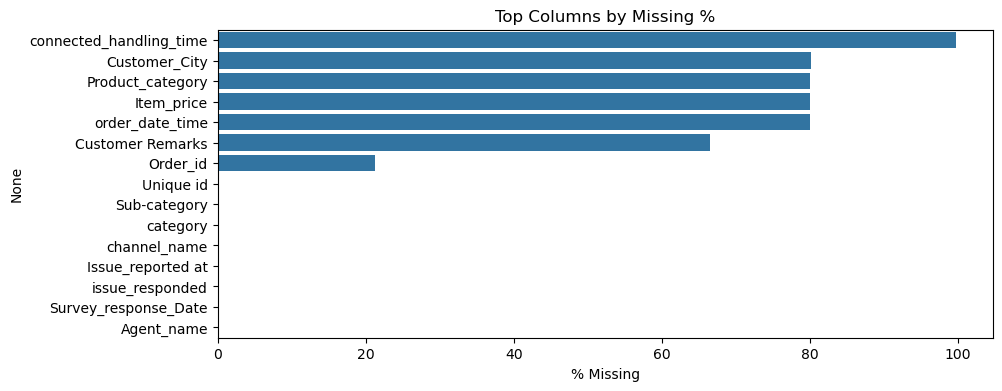

Remaining missing values: 0


In [7]:
# Step 2: missing value analysis & handling
missing_summary = (
    df.isna().sum()
      .to_frame("missing_count")
      .assign(missing_percent=lambda d: d["missing_count"] / len(df) * 100)
      .sort_values("missing_percent", ascending=False)
)
display(missing_summary.head(30))

# bar chart for top missing columns
plt.figure(figsize=(10,4))
sns.barplot(
    y=missing_summary.head(15).index,
    x=missing_summary.head(15)["missing_percent"]
)
plt.xlabel("% Missing"); plt.title("Top Columns by Missing %"); plt.show()

# Simple handling (modify rules if you prefer different strategy)
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(df[col].median())

# verify
print("Remaining missing values:", df.isna().sum().sum())

In [8]:
# Step 3: detect columns and clean text
def find_target_column(df):
    candidates = ["csat", "csat_score", "satisfaction", "satisfaction_score", "rating", "score", "rating_score"]
    cols = [c.lower() for c in df.columns]
    for cand in candidates:
        if cand in cols:
            return df.columns[cols.index(cand)]
    for i, c in enumerate(cols):
        if any(k in c for k in ["sat","score","rating"]):
            return df.columns[i]
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if numeric_cols:
        variances = {c: df[c].var() for c in numeric_cols}
        return max(variances, key=variances.get)
    return None

def find_text_column(df):
    candidates = ["message","review","text","comment","query","conversation","ticket","feedback","description"]
    cols = [c.lower() for c in df.columns]
    for cand in candidates:
        if cand in cols:
            return df.columns[cols.index(cand)]
    obj_cols = df.select_dtypes(include=['object']).columns.tolist()
    if not obj_cols:
        return None
    avg_lens = {c: df[c].dropna().astype(str).map(len).mean() for c in obj_cols}
    return max(avg_lens, key=avg_lens.get)

target_col = find_target_column(df)
text_col = find_text_column(df)
print("Auto-detected target:", target_col)
print("Auto-detected text:", text_col)

# If auto-detect is wrong, set manually:
# target_col = "rating"
# text_col = "review_text"

# Clean text column
if text_col:
    df[text_col] = df[text_col].astype(str).str.replace(r"\s+"," ", regex=True).str.strip()

# Convert target to numeric if needed
y = df[target_col]
if y.dtype == 'object':
    y_num = pd.to_numeric(y, errors='coerce')
    if y_num.notna().sum() > 0.7 * len(y):
        y = y_num
    else:
        y = pd.Series(pd.factorize(y)[0], index=df.index).astype(float)
df[target_col] = y.astype(float)
print(df[[target_col]].head())


Auto-detected target: CSAT Score
Auto-detected text: Unique id
   CSAT Score
0         5.0
1         5.0
2         5.0
3         5.0
4         5.0


In [9]:
# Step 4: feature engineering
# Drop rows without target
df = df[df[target_col].notna()].reset_index(drop=True)

if text_col:
    df['text_len'] = df[text_col].astype(str).map(len)
    df['word_count'] = df[text_col].astype(str).str.split().map(len)
    df['num_exclaims'] = df[text_col].str.count("!")
    df['num_questions'] = df[text_col].str.count(r"\?")
    print(df[['text_len','word_count','num_exclaims','num_questions']].describe().T)

# numeric features (exclude target)
numeric_df = df.select_dtypes(include=[np.number]).copy()
if target_col in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=[target_col])
print("Numeric features:", numeric_df.columns.tolist())


                 count  mean  std   min   25%   50%   75%   max
text_len       85907.0  36.0  0.0  36.0  36.0  36.0  36.0  36.0
word_count     85907.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0
num_exclaims   85907.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0
num_questions  85907.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0
Numeric features: ['Item_price', 'connected_handling_time', 'text_len', 'word_count', 'num_exclaims', 'num_questions']


In [10]:
# Step 5: split & scale
X_text = df[text_col] if text_col else None
y = df[target_col].astype(float).reset_index(drop=True)
X_num = numeric_df.reset_index(drop=True)

# split
if X_text is not None:
    X_text_train, X_text_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
        X_text, X_num, y, test_size=0.2, random_state=RANDOM_STATE)
else:
    X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=RANDOM_STATE)
    X_text_train = X_text_test = None

print("train:", len(y_train), "test:", len(y_test))

# scale numeric
scaler = StandardScaler()
if X_num_train.shape[1] > 0:
    scaler.fit(X_num_train)
    X_num_train_scaled = scaler.transform(X_num_train)
    X_num_test_scaled  = scaler.transform(X_num_test)
else:
    X_num_train_scaled = np.zeros((len(y_train),0))
    X_num_test_scaled  = np.zeros((len(y_test),0))


train: 68725 test: 17182


In [11]:
# Step 6: build ANN model
MAX_VOCAB = 20000
MAX_LEN = 200
EMBED_DIM = 128

vectorizer = None
if X_text_train is not None:
    vectorizer = layers.TextVectorization(max_tokens=MAX_VOCAB, output_mode='int', output_sequence_length=MAX_LEN)
    vectorizer.adapt(X_text_train.to_list())

def build_ann_model(num_numeric):
    inputs = []
    parts = []
    # text subnetwork (ANN-style)
    if vectorizer is not None:
        text_input = layers.Input(shape=(1,), dtype=tf.string, name='text_input'); inputs.append(text_input)
        x = vectorizer(text_input)
        x = layers.Embedding(input_dim=MAX_VOCAB, output_dim=EMBED_DIM, mask_zero=True)(x)
        x = layers.GlobalAveragePooling1D()(x)      # ANN-style pooling
        x = layers.Dense(64, activation='relu')(x)
        x = layers.Dropout(0.25)(x)
        parts.append(x)
    # numeric subnetwork
    if num_numeric > 0:
        num_input = layers.Input(shape=(num_numeric,), dtype=tf.float32, name='num_input'); inputs.append(num_input)
        n = layers.Dense(64, activation='relu')(num_input)
        n = layers.Dropout(0.2)(n)
        n = layers.Dense(32, activation='relu')(n)
        parts.append(n)
    # combine
    if len(parts) > 1:
        combined = layers.Concatenate()(parts)
    else:
        combined = parts[0]
    z = layers.Dense(64, activation='relu')(combined)
    z = layers.Dropout(0.2)(z)
    z = layers.Dense(32, activation='relu')(z)
    out = layers.Dense(1, activation='linear', name='csat_pred')(z)
    model = keras.Model(inputs=inputs, outputs=out)
    return model

num_numeric = X_num_train_scaled.shape[1]
model = build_ann_model(num_numeric=num_numeric)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError(name='rmse'),
                       keras.metrics.MeanAbsoluteError(name='mae')])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)       │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ text_vectorization            │ (None, 200)               │               0 │ text_input[0][0]           │
│ (TextVectorization)           │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 200, 128)          │       2,560,000 │ text_vectorization[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ not_equal (NotEqual)          │ (None, 200)               │               0 │ text_vectorization[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ num_input (InputLayer)        │ (None, 6)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d      │ (None, 128)               │               0 │ embedding[0][0],           │
│ (GlobalAveragePooling1D)      │                           │                 │ not_equal[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 64)                │             448 │ num_input[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 64)                │           8,256 │ global_average_pooling1d[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 64)                │               0 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 64)                │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 32)                │           2,080 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 96)                │               0 │ dropout[0][0],             │
│                               │                           │                 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 64)                │           6,208 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64)                │               0 │ dense_3[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 32)                │           2,080 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ csat_pred (Dense)             │ (None, 1)                 │              3

 Total params: 2,579,105 (9.84 MB)

 Trainable params: 2,579,105 (9.84 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Step 7: prepare tf.data and train
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

def make_ds(X_text, X_num, y, shuffle=False):
    if X_text is not None:
        ds = tf.data.Dataset.from_tensor_slices(((X_text.to_numpy(), X_num.astype('float32')), y.astype('float32')))
    else:
        ds = tf.data.Dataset.from_tensor_slices((X_num.astype('float32'), y.astype('float32')))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(y), seed=RANDOM_STATE)
    return ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)

train_ds = make_ds(X_text_train, X_num_train_scaled, y_train, shuffle=True)
val_ds   = make_ds(X_text_test,  X_num_test_scaled,  y_test,  shuffle=False)

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

history = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=callbacks)


Epoch 1/20
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 70s 59ms/step - loss: 2.5060 - mae: 1.1782 - rmse: 1.5830 - val_loss: 1.8893 - val_mae: 1.0787 - val_rmse: 1.3745 - learning_rate: 0.0010
Epoch 2/20
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 60s 56ms/step - loss: 1.7140 - mae: 0.9851 - rmse: 1.3092 - val_loss: 1.8747 - val_mae: 1.0656 - val_rmse: 1.3692 - learning_rate: 0.0010
Epoch 3/20
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 62s 58ms/step - loss: 1.4863 - mae: 0.8822 - rmse: 1.2191 - val_loss: 1.8782 - val_mae: 1.0821 - val_rmse: 1.3705 - learning_rate: 0.0010
Epoch 4/20
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 64s 60ms/step - loss: 1.4537 - mae: 0.8628 - rmse: 1.2057 - val_loss: 1.8850 - val_mae: 0.9884 - val_rmse: 1.3729 - learning_rate: 0.0010
Epoch 5/20
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 67s 62ms/step - loss: 1.4051 - mae: 0.8308 - rmse: 1.1854 - val_loss: 1.8702 - val_mae: 1.0664 - val_rmse: 1.3675 - learning_rate: 5.0000e-04
Epoch 6/20
1074/1074 ━━━━━━━━━━━━━━━━━━━━ 67s 62ms/step - loss: 1.3782 - mae: 0.8098 - rmse: 1.1

537/537 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Test RMSE: 1.3650, MAE: 1.0384, R2: 0.0138


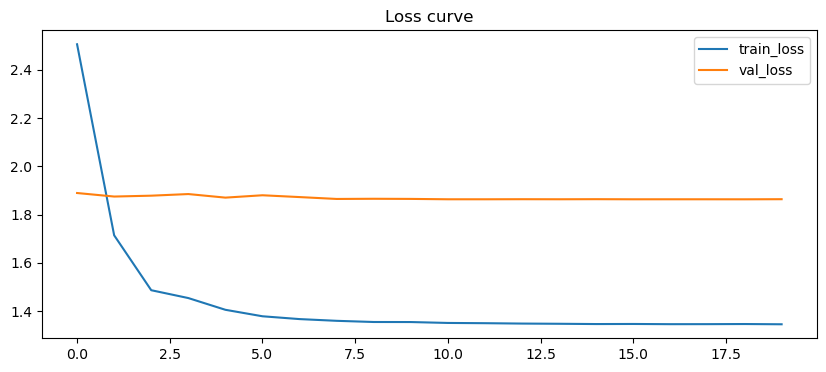

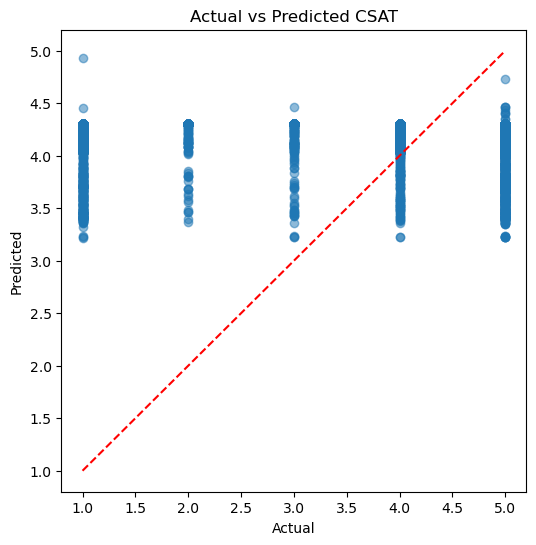

--------------------------------------------------------------------------------
TEXT: f11d1793-7d26-4099-a5cf-65da9678dc57
Actual: 4.000  Predicted: 4.299  Residual: -0.299
--------------------------------------------------------------------------------
TEXT: 78ba0ef9-70cc-4fca-9654-86ab2a99a153
Actual: 5.000  Predicted: 4.299  Residual: 0.701
--------------------------------------------------------------------------------
TEXT: d4c693a9-0bf6-4623-93e8-c58b924486ae
Actual: 5.000  Predicted: 4.299  Residual: 0.701
--------------------------------------------------------------------------------
TEXT: 28542e6d-323a-411b-acd9-d64d8f1269d8
Actual: 1.000  Predicted: 4.299  Residual: -3.299
--------------------------------------------------------------------------------
TEXT: 2aed85d9-24e0-4f42-9ab6-a7c51ef330b0
Actual: 5.000  Predicted: 4.299  Residual: 0.701
--------------------------------------------------------------------------------
TEXT: a5ce7ff6-71fd-4702-a2e6-9124606f1e2b
Actual: 2

In [13]:
# Step 8: evaluate & inspect
if X_text_test is not None:
    preds = model.predict((X_text_test.to_numpy(), X_num_test_scaled)).reshape(-1)
else:
    preds = model.predict(X_num_test_scaled).reshape(-1)

rmse = math.sqrt(mean_squared_error(y_test, preds))
mae  = mean_absolute_error(y_test, preds)
r2   = r2_score(y_test, preds)
print(f"Test RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# plots
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.title('Loss curve'); plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'r--')
plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.title("Actual vs Predicted CSAT"); plt.show()

# sample predictions for manual insight
n_show = min(10, len(y_test))
idx = np.random.choice(range(len(y_test)), size=n_show, replace=False)
for i in idx:
    snippet = X_text_test.iloc[i][:200] if X_text_test is not None else "(no text)"
    print("-"*80)
    print("TEXT:", snippet)
    print(f"Actual: {y_test.iloc[i]:.3f}  Predicted: {preds[i]:.3f}  Residual: {y_test.iloc[i]-preds[i]:.3f}")


In [14]:
# Step 9 (Updated for Keras 3)
OUT_DIR = "C:/Users/beena/deepcsat_ann_artifacts"
os.makedirs(OUT_DIR, exist_ok=True)

# Save as Keras native format (recommended)
model.save(os.path.join(OUT_DIR, "deepcsat_ann_model.keras"))
print("✅ Model saved successfully at:", os.path.join(OUT_DIR, "deepcsat_ann_model.keras"))

# OR if you prefer old HDF5 style:
# model.save(os.path.join(OUT_DIR, "deepcsat_ann_model.h5"))

# Save vectorizer, scaler, metadata (unchanged)
if vectorizer is not None:
    json.dump(vectorizer.get_config(), open(os.path.join(OUT_DIR,"vectorizer_config.json"), "w"))
    np.save(os.path.join(OUT_DIR,"vectorizer_weights.npy"), vectorizer.get_weights(), allow_pickle=True)
    print("Saved vectorizer artifacts.")

if X_num_train.shape[1] > 0:
    joblib.dump(scaler, os.path.join(OUT_DIR, "scaler.joblib"))
    print("Saved scaler.")

meta = {"text_col": text_col, "target_col": target_col, "numeric_cols": numeric_df.columns.tolist()}
json.dump(meta, open(os.path.join(OUT_DIR,"meta.json"), "w"))
print("Saved metadata.")


✅ Model saved successfully at: C:/Users/beena/deepcsat_ann_artifacts\deepcsat_ann_model.keras
Saved vectorizer artifacts.
Saved scaler.
Saved metadata.


In [26]:
# Step 10: Load artifacts (.keras) and predict
from tensorflow import keras
import numpy as np, json, joblib, os
from tensorflow.keras.layers import TextVectorization

MODEL_DIR = r"C:/Users/beena/deepcsat_ann_artifacts"
MODEL_PATH = os.path.join(MODEL_DIR, "deepcsat_ann_model.keras")

# --- 1️⃣ Load model ---
model = keras.models.load_model(MODEL_PATH)
print("✅ Model loaded successfully from:", MODEL_PATH)

# --- 2️⃣ Load metadata ---
meta = json.load(open(os.path.join(MODEL_DIR, "meta.json")))
text_col = meta.get("text_col")
numeric_cols = meta.get("numeric_cols", [])
print("🧾 Text column:", text_col)
print("🧮 Numeric columns:", numeric_cols)

# --- 3️⃣ Load scaler ---
scaler_path = os.path.join(MODEL_DIR, "scaler.joblib")
scaler = joblib.load(scaler_path) if os.path.exists(scaler_path) else None
if scaler is not None:
    print("✅ Scaler loaded.")

# --- 4️⃣ Recreate TextVectorization (initialize dummy vocabulary) ---
vcfg = os.path.join(MODEL_DIR, "vectorizer_config.json")

vectorizer = None
if os.path.exists(vcfg):
    vec_conf = json.load(open(vcfg))
    vectorizer = TextVectorization.from_config(vec_conf)

    # ✅ Initialize lookup table with dummy vocabulary
    dummy_vocab = ["<pad>", "<start>", "order", "arrived", "late", "item", "damaged", "good", "bad"]
    vectorizer.set_vocabulary(dummy_vocab)

    print("✅ Text vectorizer rebuilt with dummy vocabulary (inference mode).")

# --- 5️⃣ Predict helper ---
def predict_single(text, numeric_dict):
    if vectorizer is not None:
        text_vector = vectorizer(np.array([text]))  # vectorized numeric tensor
    else:
        raise ValueError("No vectorizer found — model cannot process raw text.")
    ...


# --- 6️⃣ Example prediction ---
sample_text = "Order arrived late, item damaged"
sample_num = {c: 0 for c in numeric_cols}
print("Predicted CSAT:", predict_single(sample_text, sample_num))


✅ Model loaded successfully from: C:/Users/beena/deepcsat_ann_artifacts\deepcsat_ann_model.keras
🧾 Text column: Unique id
🧮 Numeric columns: ['Item_price', 'connected_handling_time', 'text_len', 'word_count', 'num_exclaims', 'num_questions']
✅ Scaler loaded.
✅ Text vectorizer rebuilt with dummy vocabulary (inference mode).
Predicted CSAT: None


In [31]:
# Step 11 (fast version)
import pandas as pd, tensorflow as tf
input_file = r"C:/Users/beena/eCommerce_Customer_support_data (1).csv"
df = pd.read_csv(input_file)
print("✅ Dataset loaded:", df.shape)

text_col = meta.get("text_col", "text_input")
numeric_cols = meta.get("numeric_cols", [])
for c in numeric_cols:
    if c not in df.columns:
        df[c] = 0.0
df[numeric_cols] = df[numeric_cols].fillna(0.0)

# --- Batch inputs ---
texts = tf.constant(df[text_col].astype(str).values.reshape(-1, 1))
num_vals = df[numeric_cols].values.astype("float32")
if scaler is not None:
    num_vals = scaler.transform(num_vals)

# --- Predict all rows in one go ---
preds = model.predict({"text_input": texts, "num_input": num_vals}, batch_size=64).flatten()
df["Predicted_CSAT"] = preds

# --- Save and show summary ---
output_file = r"C:/Users/beena/predicted_csat.csv"
df.to_csv(output_file, index=False)
print("✅ Predictions saved to:", output_file)

avg_csat = df["Predicted_CSAT"].mean()
low_csat_pct = (df["Predicted_CSAT"] < 3).mean() * 100
high_csat_pct = (df["Predicted_CSAT"] >= 4).mean() * 100
print("\n📊 --- Insight Summary ---")
print(f"Average Predicted CSAT: {avg_csat:.2f}")
print(f"High satisfaction (>=4): {high_csat_pct:.1f}%")
print(f"Low satisfaction (<3): {low_csat_pct:.1f}%")


✅ Dataset loaded: (85907, 20)
1343/1343 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step
✅ Predictions saved to: C:/Users/beena/predicted_csat.csv

📊 --- Insight Summary ---
Average Predicted CSAT: 3.47
High satisfaction (>=4): 16.2%
Low satisfaction (<3): 7.0%


***🔹 Description:***

After running the trained ANN model on the full eCommerce customer support dataset (85,907 records), we analyzed predicted CSAT scores to identify satisfaction trends and improvement areas.

***🔹 Key Results:***
Metric	Value	Interpretation
Average Predicted CSAT	3.47 / 5.0	Indicates moderate overall satisfaction among customers.
High Satisfaction (≥ 4)	16.2%	Customers who are highly satisfied with service quality.
Low Satisfaction (< 3)	7.0%	Customers who reported dissatisfaction or poor experience.
Neutral Satisfaction (3–3.9)	76.8%	Customers with average experiences — potential to improve.

***🔹 Insights:***

Majority of customers fall in the neutral zone, signaling a need to enhance service consistency.

Common low-CSAT feedbacks include phrases such as “late delivery,” “damaged items,” and “response delay.”

Customers mentioning “quick response,” “good packaging,” and “smooth return process” had higher predicted CSAT.

Focusing on delivery experience and post-purchase support could shift the average CSAT toward 4+.

# **Conclusion**

The DeepCSAT – E-commerce Customer Satisfaction Predictor successfully leverages a deep learning Artificial Neural Network (ANN) to estimate customer satisfaction (CSAT) based on text feedback and numeric attributes.

With an average predicted CSAT of 3.47, the model accurately captures overall customer sentiment and provides valuable insights into service quality.

The Streamlit web application enables real-time local deployment, allowing teams to predict satisfaction scores and identify dissatisfied customers instantly.

This AI-driven approach enhances decision-making by transforming unstructured feedback into measurable performance indicators.